In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Dataset
df = pd.read_csv('train_data.csv')
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df.set_index('TIMESTAMP', inplace=True)

In [3]:
# Calculate Log Returns if not already present
df['LOG_RETURNS_HHI'] = np.log(df['LAST_PRICE_HHI'] / df['LAST_PRICE_HHI'].shift(1))
df['LOG_RETURNS_HSI'] = np.log(df['LAST_PRICE_HSI'] / df['LAST_PRICE_HSI'].shift(1))
df.dropna(inplace=True)

# Scale LOG_RETURNS_HHI
scaler = StandardScaler()
df['LOG_RETURNS_HHI_scaled'] = scaler.fit_transform(df[['LOG_RETURNS_HHI']])

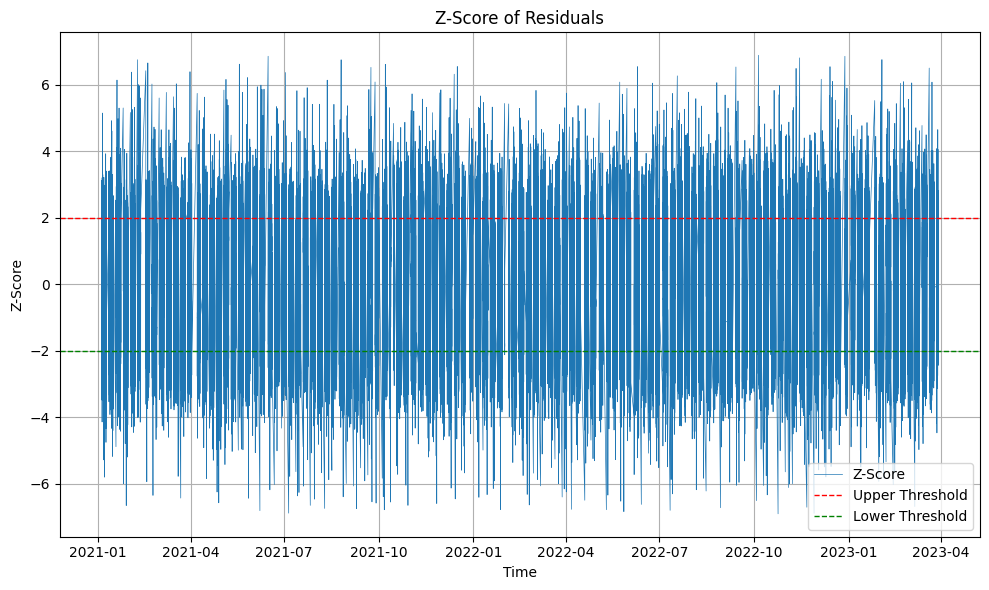

In [6]:
import matplotlib.pyplot as plt

# Train Linear Regression Model
X = df[['LOG_RETURNS_HHI_scaled']]
y = df['LOG_RETURNS_HSI']
model = LinearRegression()
model.fit(X, y)
df['predicted_HSI'] = model.predict(X)

# Calculate Residuals
df['residual'] = df['LAST_PRICE_HSI'] - df['predicted_HSI']

# Calculate Z-Score of Residuals
rolling_window = 50  # Adjust rolling window size
df['residual_mean'] = df['residual'].rolling(window=rolling_window).mean()
df['residual_std'] = df['residual'].rolling(window=rolling_window).std()
df['z_score'] = (df['residual'] - df['residual_mean']) / df['residual_std']

# Plot Z-Scores
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['z_score'], label='Z-Score', linewidth=0.5)
plt.axhline(2, color='red', linestyle='--', linewidth=1, label='Upper Threshold')
plt.axhline(-2, color='green', linestyle='--', linewidth=1, label='Lower Threshold')
plt.title('Z-Score of Residuals')
plt.xlabel('Time')
plt.ylabel('Z-Score')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [7]:
df.columns

Index(['LAST_PRICE_HSI', 'TURNOVER_VOLUME_HSI', 'LAST_BID_PRICE_HSI',
       'LAST_ASK_PRICE_HSI', 'LAST_BID_VOLUME_HSI', 'LAST_ASK_VOLUME_HSI',
       'LAST_PRICE_HHI', 'TURNOVER_VOLUME_HHI', 'LAST_BID_PRICE_HHI',
       'LAST_ASK_PRICE_HHI', 'LAST_BID_VOLUME_HHI', 'LAST_ASK_VOLUME_HHI',
       'MIDPOINT_HHI', 'MIDPOINT_HSI', 'LOG_RETURNS_HHI', 'LOG_RETURNS_HSI',
       'predicted_HSI', 'LOG_RETURNS_HHI_scaled', 'predicted_RLM', 'residual',
       'residual_mean', 'residual_std', 'z_score'],
      dtype='object')

In [9]:
df.head()

,LAST_PRICE_HSI,TURNOVER_VOLUME_HSI,LAST_BID_PRICE_HSI,LAST_ASK_PRICE_HSI,LAST_BID_VOLUME_HSI,LAST_ASK_VOLUME_HSI,LAST_PRICE_HHI,TURNOVER_VOLUME_HHI,LAST_BID_PRICE_HHI,LAST_ASK_PRICE_HHI,...,LOG_RETURNS_HHI,LOG_RETURNS_HSI,predicted_HSI,LOG_RETURNS_HHI_scaled,predicted_RLM,residual,residual_mean,residual_std,z_score,signal
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2021-01-04 09:18:00+08:00,27140.0,370.0,27140.0,27143.0,2.0,2.0,10659.0,214.0,10658.0,10660.0,...,-0.000188,-0.000184,-0.000147,-0.300921,-0.000157,27140.000147,NaN,NaN,NaN,0
2021-01-04 09:19:00+08:00,27133.0,293.0,27132.0,27135.0,3.0,4.0,10654.0,209.0,10654.0,10655.0,...,-0.000469,-0.000258,-0.000367,-0.754622,-0.000353,27133.000367,NaN,NaN,NaN,0
2021-01-04 09:20:00+08:00,27127.0,475.0,27126.0,27128.0,1.0,3.0,10660.0,251.0,10658.0,10660.0,...,0.000563,-0.000221,0.000441,0.908541,0.000354,27126.999559,NaN,NaN,NaN,0
2021-01-04 09:21:00+08:00,27132.0,313.0,27127.0,27130.0,2.0,2.0,10661.0,272.0,10660.0,10662.0,...,0.000094,0.000184,0.000073,0.152524,0.000157,27131.999927,NaN,NaN,NaN,0
2021-01-04 09:22:00+08:00,27135.0,208.0,27133.0,27135.0,2.0,2.0,10662.0,172.0,10662.0,10663.0,...,0.000094,0.000111,0.000073,0.152510,0.000118,27134.999927,NaN,NaN,NaN,0


In [20]:
def generate_trades_with_positions(df, upper_threshold=2, lower_threshold=-2, max_position=10000):
    trade_records = []  # List to store trade records
    positions = {'HHI': 0, 'HSI': 0}  # Track cumulative positions

    for i, row in df.iterrows():
        signal = row['signal']
        z_score = row['z_score']
        timestamp = row.name  # TIMESTAMP is the index

        # Calculate signal strength
        strength = scale_volume(z_score, threshold=2, z_score_limit=5)

        # Signal = 1: BUY HHI, SELL HSI
        if signal == 1:
            hhi_volume = min(
                np.floor(strength * row['LAST_ASK_VOLUME_HHI']),
                max_position - positions['HHI']
            )
            hsi_volume = min(
                np.floor(strength * row['LAST_BID_VOLUME_HSI']),
                max_position + positions['HSI']  # HSI is sold, so negative position
            )

            if hhi_volume > 0:
                positions['HHI'] += hhi_volume
                trade_records.append({
                    'FEEDCODE': 'HHI',
                    'VOLUME': hhi_volume,
                    'BUYSELL': 'B',
                    'PRICE': row['LAST_ASK_PRICE_HHI'],
                    'TIMESTAMP': timestamp
                })
            if hsi_volume > 0:
                positions['HSI'] -= hsi_volume
                trade_records.append({
                    'FEEDCODE': 'HSI',
                    'VOLUME': hsi_volume,
                    'BUYSELL': 'S',
                    'PRICE': row['LAST_BID_PRICE_HSI'],
                    'TIMESTAMP': timestamp
                })

        # Signal = -1: SELL HHI, BUY HSI
        elif signal == -1:
            hhi_volume = min(
                np.floor(strength * row['LAST_BID_VOLUME_HHI']),
                max_position + positions['HHI']  # HHI is sold, so negative position
            )
            hsi_volume = min(
                np.floor(strength * row['LAST_ASK_VOLUME_HSI']),
                max_position - positions['HSI']
            )

            if hhi_volume > 0:
                positions['HHI'] -= hhi_volume
                trade_records.append({
                    'FEEDCODE': 'HHI',
                    'VOLUME': hhi_volume,
                    'BUYSELL': 'S',
                    'PRICE': row['LAST_BID_PRICE_HHI'],
                    'TIMESTAMP': timestamp
                })
            if hsi_volume > 0:
                positions['HSI'] += hsi_volume
                trade_records.append({
                    'FEEDCODE': 'HSI',
                    'VOLUME': hsi_volume,
                    'BUYSELL': 'B',
                    'PRICE': row['LAST_ASK_PRICE_HSI'],
                    'TIMESTAMP': timestamp
                })

    trade_df = pd.DataFrame(trade_records)
    return trade_df, positions


# Generate Trades
trade_df, final_positions = generate_trades_with_positions(df)

# Display Trade DataFrame with PnL and Final Positions
print(trade_df.head())
print("Final Positions:", final_positions)



  FEEDCODE  VOLUME BUYSELL    PRICE                 TIMESTAMP
0      HHI     2.0       B  10661.0 2021-01-04 10:39:00+08:00
1      HSI     1.0       S  27311.0 2021-01-04 10:40:00+08:00
2      HHI     1.0       B  10661.0 2021-01-04 10:41:00+08:00
3      HHI     2.0       B  10661.0 2021-01-04 10:42:00+08:00
4      HHI     1.0       B  10659.0 2021-01-04 10:43:00+08:00
Final Positions: {'HHI': -312.0, 'HSI': -428.0}


In [ ]:
# Function to map month and year to contract code
def map_feedcode(timestamp, base_feedcode):
    # Map months to contract codes
    month_to_contract = {
        1: 'F', 2: 'G', 3: 'H', 4: 'J',
        5: 'K', 6: 'M', 7: 'N', 8: 'Q',
        9: 'U', 10: 'V', 11: 'X', 12: 'Z'
    }
    
    month_code = month_to_contract[timestamp.month]  # Get the contract month code
    year_code = str(timestamp.year)[-1]  # Get the last digit of the year

    # Construct the feedcode
    return f"{base_feedcode}{month_code}{year_code}"

# Finalize trade DataFrame with correct Feedcode and column order
def finalize_trade_df(trade_df):
    # Update FEEDCODE based on TIMESTAMP
    trade_df['FEEDCODE'] = trade_df.apply(
        lambda row: map_feedcode(row['TIMESTAMP'], row['FEEDCODE']), axis=1
    )

    # Rearrange columns to TIMESTAMP, FEEDCODE, VOLUME, BUYSELL, PRICE
    trade_df = trade_df[['TIMESTAMP', 'FEEDCODE', 'VOLUME', 'BUYSELL', 'PRICE']]

    return trade_df

# Apply the finalization function
trade_df = finalize_trade_df(trade_df)

# Save to CSV
trade_df.to_csv('trade_table.csv', index=False)

# Display the finalized DataFrame
print(trade_df.head())


                  TIMESTAMP FEEDCODE  VOLUME BUYSELL    PRICE
0 2021-01-04 10:39:00+08:00    HHIF1     2.0       B  10661.0
1 2021-01-04 10:40:00+08:00    HSIF1     1.0       S  27311.0
2 2021-01-04 10:41:00+08:00    HHIF1     1.0       B  10661.0
3 2021-01-04 10:42:00+08:00    HHIF1     2.0       B  10661.0
4 2021-01-04 10:43:00+08:00    HHIF1     1.0       B  10659.0
